In [1]:
%matplotlib inline
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Lib.BEM_Solver.BEM_2D import *
from Lib.Domain_Decomposition.Coupling_Main import *

[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:55 E-T(18,37)
[Mesh] Number of Nodes:165 E-T(54-111)


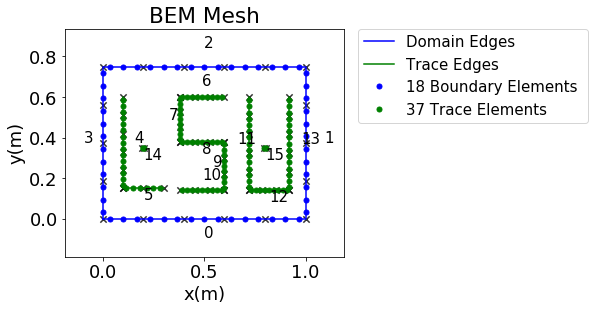

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(4, 50), (5, 50), (11, 50), (12, 50), (13, 50), (14, 10), (15, 10)]
[Boundary Condition] Neumann BC @ [(6, -100), (7, -100), (8, -100), (9, -100), (10, -100)]


In [2]:
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 0.75), (0.0, 0.75)] #Anti-clock wise for internal domain

Trace_vert=[]
L=[((0.1, 0.15), (0.1, 0.6)),((0.1, 0.15), (0.3, 0.15))]
S=[((0.6,0.6),(0.38,0.6)),((0.38,0.6),(0.38,0.38)),((0.38,0.38),(0.6,0.38)),((0.6,0.38),(0.6,0.14)),((0.6,0.14),(0.38,0.14))]
U= [((0.72,0.6),(0.72,0.14)),((0.72,0.14),(0.92,0.14)),((0.92,0.14),(0.92,0.6))]
Points= [((0.195,0.35),(0.205,0.35)),
      ((0.795,0.35),(0.805,0.35))]
Trace_vert=L+S+U+Points
element_esize=0.2 #Edge mesh is important to overall mass balance
element_tszie=0.1 #Trace mesh size

BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,element_esize,element_tszie,Type="Quad")
BEM_Case1.plot_Mesh()

#2.Set Boundary condition
bc0=[(4,50),(5,50),(11,50),(12,50),(13,50),(14,10),(15,10)]
bc1=[(6,-100),(7,-100),(8,-100),(9,-100),(10,-100)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)
#BEM_Case1.Mesh.print_debug()

[Visulization] Plotting Solution


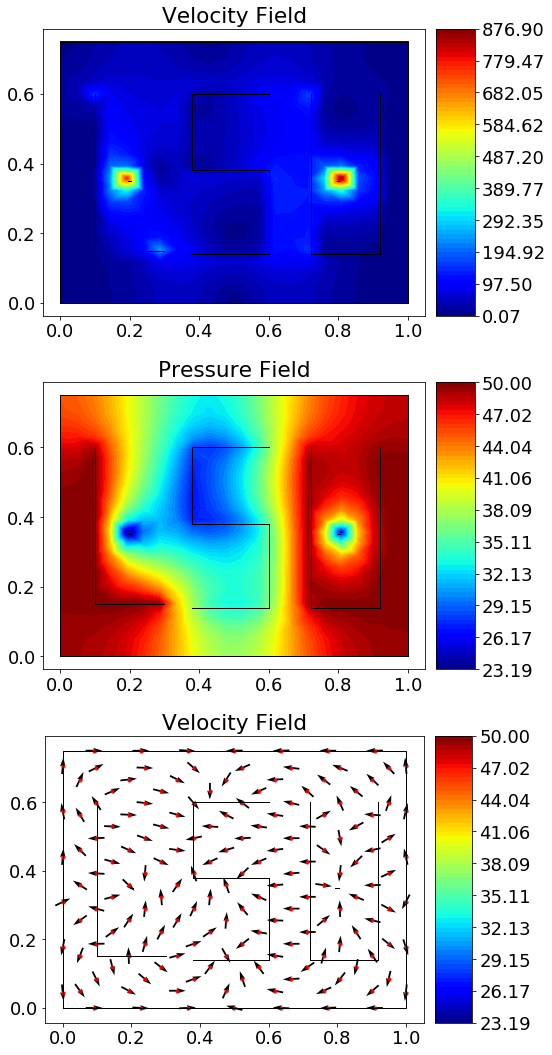

In [3]:
#3. Solve and plot
Mat=BEM_Case1.Solve()
#BEM_Case1.PostProcess.print_Solution()

PUV=BEM_Case1.PostProcess.plot_Solution()
#PUV2=BEM_Case1.plot_SolutionBD()

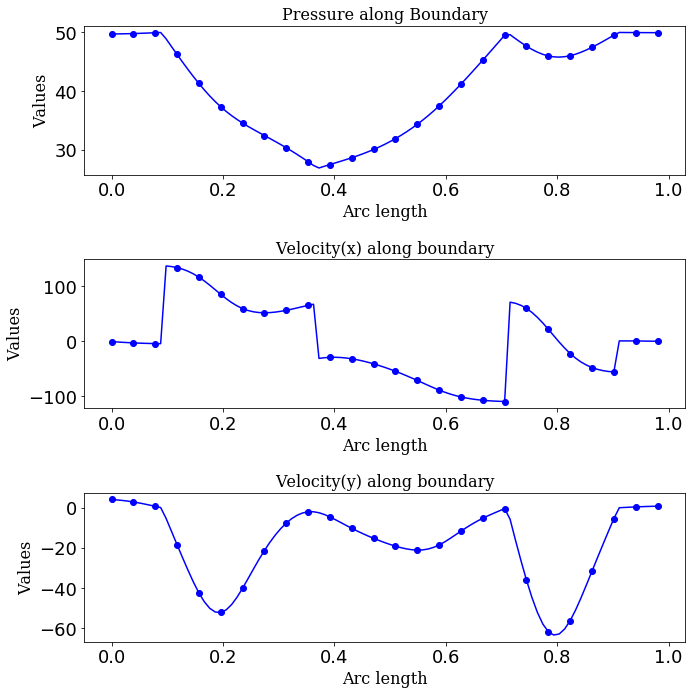

In [5]:
XY=BEM_Case1.PostProcess.plot_Solution_overline((0.01,0.45),(0.99,0.45))